In [109]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np # linear algebra
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [124]:
data_dir = 'D:\Datasets\Chess Dataset\data'

In [64]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True, validation_split=0.2)


In [81]:
 image_size = (256, 256)
batch = 32

train = datagen.flow_from_directory(
    data_dir,
    subset='training',
    seed=42,
    target_size=image_size,
    batch_size=batch,
    class_mode='categorical'
)

Found 963 images belonging to 6 classes.


In [82]:
validation =datagen.flow_from_directory(
    data_dir,
    subset='validation',
    seed=42,
    target_size=image_size,
    batch_size=batch,
    class_mode='categorical'
)

Found 238 images belonging to 6 classes.


In [67]:
for data_batch, labels_batch in train:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    data_batch_check = data_batch
    labels_batch_check = labels_batch
    break

data batch shape: (32, 256, 256, 3)
labels batch shape: (32, 6)


Printing the Image of Index 5 for current batch.
Showing the image: 


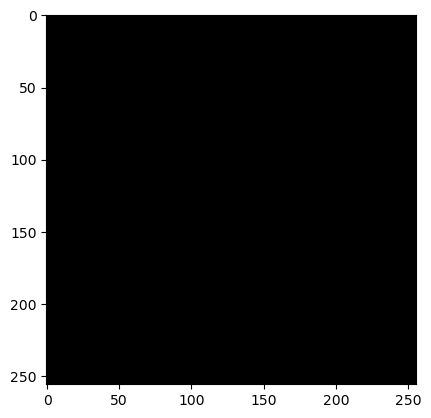


Showing the data shape: 
(256, 256, 3)

Showing the label:
[0. 0. 0. 0. 1. 0.]


In [68]:
index = 5
print("Printing the Image of Index {} for current batch.".format(index))
print("Showing the image: ")

plt.imshow(data_batch_check[index])
plt.show()

print("\nShowing the data shape: ")
print(data_batch_check[index].shape)

print("\nShowing the label:")
print(labels_batch_check[index])

In [69]:
label_names = list(train.class_indices.keys())
label_names

['King_resized',
 'Queen-Resized',
 'Rook-resize',
 'bishop_resized',
 'knight-resize',
 'pawn_resized']

In [71]:
# class_names = list(train.class_indices.keys())


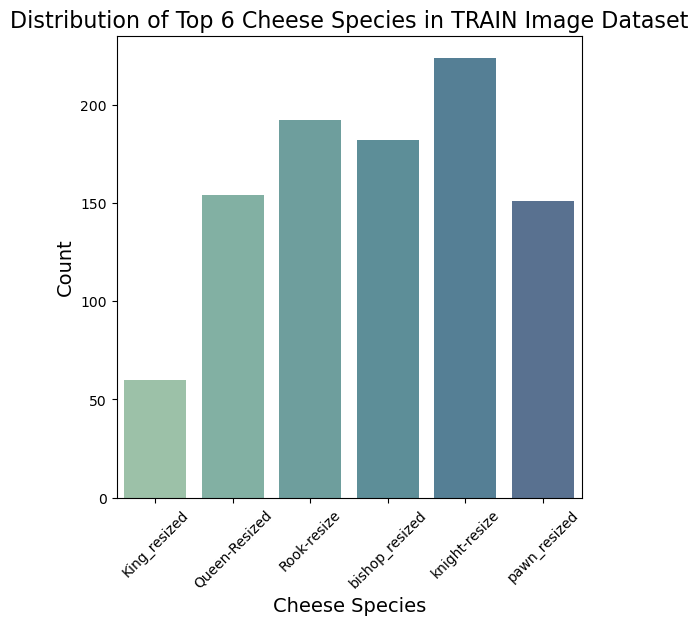

In [72]:
label_counts = train.classes  # This gives you the indices of the classes in the generator
counts = np.bincount(label_counts)## Count the occurrences of each class

# Get the corresponding class names
class_names = [key for key, value in train.class_indices.items()]

# Select the top 6 classes
top_classes = class_names[:]
top_counts = counts[:]

# Plot the bar chart
plt.figure(figsize=(6, 6))
sns.barplot(x=top_classes, y=top_counts, alpha=0.8, palette='crest')
plt.title('Distribution of Top 6 Cheese Species in TRAIN Image Dataset', fontsize=16)
plt.xlabel('Cheese Species', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [73]:
top_classes

['King_resized',
 'Queen-Resized',
 'Rook-resize',
 'bishop_resized',
 'knight-resize',
 'pawn_resized']

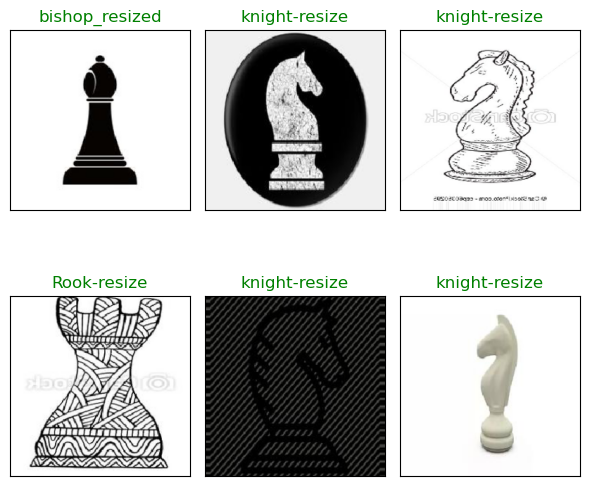

In [83]:
# Get indices of samples corresponding to the top 6 classes
top_indices = []
seen_classes = set()

for i, label in enumerate(train.classes):
    class_name = class_names[label]
    if class_name in top_classes and class_name not in seen_classes:
        top_indices.append(i)
        seen_classes.add(class_name)# Get indices of samples corresponding to the top 20 classes
top_indices = [i for i, label in enumerate(train.classes) if class_names[label] in top_classes]

# Plot the images for the top 6 classes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6),
                         subplot_kw={'xticks': [], 'yticks': []})


for i, ax in enumerate(axes.flat):
    sample_index = top_indices[i]
    image, label = train[sample_index]
    label = np.argmax(label)
    ax.imshow(image[0])
    ax.set_title(class_names[label], color='green')
    
    
plt.tight_layout()
plt.show()

In [75]:
top_counts

array([ 60, 154, 192, 182, 224, 151], dtype=int64)

In [84]:
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(top_classes), activation='softmax'))


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 30, 30, 128)     

In [31]:
# from tensorflow import keras
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# image_size = (256, 256)
# #num_classes = len(train.class_names)  # Assuming you have access to the train object

# input_shape = image_size + (3,)
# reg = keras.regularizers.l2(0.0005)

# model = keras.Sequential()
# model.add(Conv2D(16, (3, 3), strides=(1, 1), padding='valid', input_shape=input_shape, activation='relu', kernel_regularizer=reg))
# #model.add(Conv2D(16, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.1))

# model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))


# model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# # model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# # model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# # model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_regularizer=reg))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(6, activation='softmax'))

# model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 123, 123, 32)      9248      
                                                                 
 dropout_9 (Dropout)         (None, 123, 123, 32)      0         
                                                      

In [76]:
# from tensorflow.keras import models, layers

# ## adding a base CNN network
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150,150,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# ## adding a classifier
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation = 'relu'))
# # model.add(layers.Dense(64, activation = 'relu'))
# model.add(layers.Dense(6, activation = 'softmax'))

# model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 17, 17, 128)      

In [85]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
#You can increase the number of epochs to get a more accurate result with the data and reduce the loss
epochs = 30
model.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/30
31/31 [==============================] - 143s 4s/step - loss: 2.4170 - accuracy: 0.1848 - val_loss: 1.7934 - val_accuracy: 0.2353
Epoch 2/30
31/31 [==============================] - 134s 4s/step - loss: 1.8036 - accuracy: 0.2181 - val_loss: 1.7955 - val_accuracy: 0.3109
Epoch 3/30
31/31 [==============================] - 133s 4s/step - loss: 1.7773 - accuracy: 0.2606 - val_loss: 1.7308 - val_accuracy: 0.2941
Epoch 4/30
31/31 [==============================] - 133s 4s/step - loss: 1.7117 - accuracy: 0.3281 - val_loss: 1.6894 - val_accuracy: 0.3739
Epoch 5/30
31/31 [==============================] - 135s 4s/step - loss: 1.6294 - accuracy: 0.3551 - val_loss: 1.6072 - val_accuracy: 0.4454
Epoch 6/30
31/31 [==============================] - 135s 4s/step - loss: 1.5015 - accuracy: 0.4413 - val_loss: 1.5928 - val_accuracy: 0.4328
Epoch 7/30
31/31 [==============================] - 135s 4s/step - loss: 1.4863 - accuracy: 0.4683 - val_loss: 1.4027 - val_accuracy: 0.5210
Epoch 8/30
31

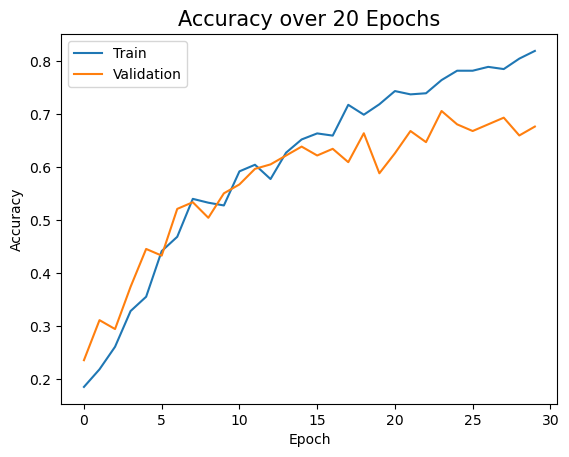

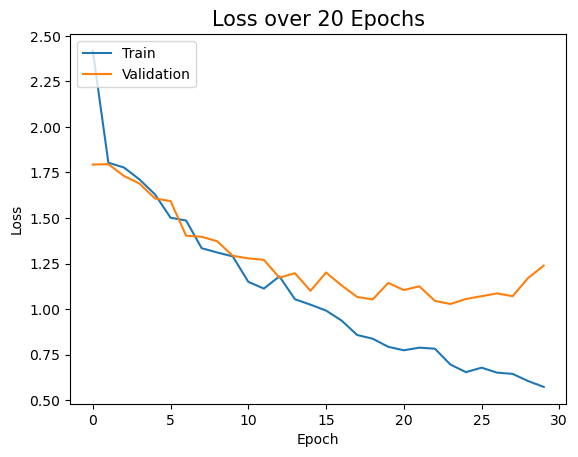

In [86]:

def plot_acc_loss(model, epochs):
    # Plot training & validation accuracy values
    plt.plot(model.history.history['accuracy'])
    plt.plot(model.history.history['val_accuracy'])
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_acc_loss(model, 20)

In [87]:
model.evaluate(validation)


8/8 [==============================] - 16s 2s/step - loss: 1.1730 - accuracy: 0.6891


[1.1730146408081055, 0.6890756487846375]

In [88]:
model.save('chess_piece.keras')

In [89]:
from tensorflow.keras.models import load_model

loaded_model = load_model('chess_piece.keras')

1/1 [==============================] - 1s 1s/step


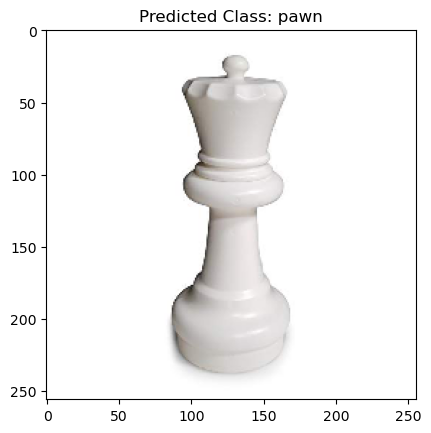

In [90]:
from tensorflow.keras.preprocessing import image

# Load the trained model
loaded_model = tf.keras.models.load_model('chess_piece.keras')

# Path to the image you want to predict
image_path = r'D:\Datasets\Chess Dataset\data\Queen-Resized\00000008.jpg'


# Load and preprocess the image
img = image.load_img(image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values

# Make predictions
predictions = loaded_model.predict(img_array)

# Get the predicted class label
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']  # Make sure the order matches your training data
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

# Display the image and predicted class
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

In [92]:
# get the Inception V3 base model
from tensorflow.keras.applications import InceptionV3

# set the base model without its dense classifier, with input shape = 256 x 256, and freeze it
base_model = InceptionV3(include_top = False, input_shape = (256, 256, 3))
base_model.trainable = False

base_model.summary()

87910968/87910968 [==============================] - 92s 1us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_127 (Conv2D)         (None, 127, 127, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_96 (Ba  (None, 127, 127, 32)         96        ['conv2d_127[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activ

                                                                                                  
 conv2d_137 (Conv2D)         (None, 29, 29, 96)           82944     ['activation_103[0][0]']      
                                                                                                  
 conv2d_138 (Conv2D)         (None, 29, 29, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_101 (B  (None, 29, 29, 64)           192       ['conv2d_132[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_103 (B  (None, 29, 29, 64)           192       ['conv2d_134[0][0]']          
 atchNormalization)                                                                               
          

                                                                                                  
 activation_108 (Activation  (None, 29, 29, 64)           0         ['batch_normalization_110[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 29, 29, 96)           0         ['batch_normalization_113[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 29, 29, 64)           0         ['batch_normalization_114[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (C

                                                                                                  
 activation_121 (Activation  (None, 29, 29, 64)           0         ['batch_normalization_123[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_155 (Conv2D)         (None, 29, 29, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_124 (B  (None, 29, 29, 96)           288       ['conv2d_155[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, 29, 29, 96)           0         ['batch_normalization_124[0][0
 )        

 average_pooling2d_12 (Aver  (None, 14, 14, 768)          0         ['mixed3[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_157 (Conv2D)         (None, 14, 14, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_160 (Conv2D)         (None, 14, 14, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_165 (Conv2D)         (None, 14, 14, 192)          172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_166 (Conv2D)         (None, 14, 14, 192)          147456    ['average_pooling2d_12[0][0]']
          

 )                                                                  ]']                           
                                                                                                  
 activation_141 (Activation  (None, 14, 14, 160)          0         ['batch_normalization_143[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 14, 14, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_167 (Conv2D)         (None, 14, 14, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_17

                                                                                                  
 batch_normalization_153 (B  (None, 14, 14, 160)          480       ['conv2d_184[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 14, 14, 160)          0         ['batch_normalization_148[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 14, 14, 160)          0         ['batch_normalization_153[0][0
 )                                                                  ]']                           
                                                                                                  
 average_p

                                                                                                  
 conv2d_194 (Conv2D)         (None, 14, 14, 192)          258048    ['activation_160[0][0]']      
                                                                                                  
 batch_normalization_158 (B  (None, 14, 14, 192)          576       ['conv2d_189[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_163 (B  (None, 14, 14, 192)          576       ['conv2d_194[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 14, 14, 192)          0         ['batch_normalization_158[0][0
 )        

                                                                                                  
 activation_168 (Activation  (None, 14, 14, 192)          0         ['batch_normalization_170[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_198 (Conv2D)         (None, 6, 6, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_202 (Conv2D)         (None, 6, 6, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_167 (B  (None, 6, 6, 320)            960       ['conv2d_198[0][0]']          
 atchNormalization)                                                                               
          

                                                                                                  
 activation_173 (Activation  (None, 6, 6, 384)            0         ['batch_normalization_175[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 6, 6, 384)            0         ['batch_normalization_178[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 6, 6, 384)            0         ['batch_normalization_179[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_nor

                                                                                                  
 activation_181 (Activation  (None, 6, 6, 384)            0         ['batch_normalization_183[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 6, 6, 384)            0         ['batch_normalization_184[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 6, 6, 384)            0         ['batch_normalization_187[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

In [93]:
# compile the model for training
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy'
             ,optimizer = optimizers.Adam(learning_rate = 0.01)
             ,metrics = ['accuracy'])

In [94]:
# training with flattened CNN
history = model.fit(train
         ,steps_per_epoch = len(train)
         ,epochs = 10
         ,validation_data = validation
         ,validation_steps = int(0.25*len(validation)))

Epoch 1/10
31/31 [==============================] - 137s 4s/step - loss: 3.7757 - accuracy: 0.2482 - val_loss: 1.8679 - val_accuracy: 0.2031
Epoch 2/10
31/31 [==============================] - 124s 4s/step - loss: 1.8057 - accuracy: 0.2627 - val_loss: 1.7215 - val_accuracy: 0.2812
Epoch 3/10
31/31 [==============================] - 123s 4s/step - loss: 1.7415 - accuracy: 0.3105 - val_loss: 1.6641 - val_accuracy: 0.3281
Epoch 4/10
31/31 [==============================] - 123s 4s/step - loss: 1.6416 - accuracy: 0.3624 - val_loss: 1.5701 - val_accuracy: 0.4375
Epoch 5/10
31/31 [==============================] - 123s 4s/step - loss: 1.5910 - accuracy: 0.4071 - val_loss: 1.7171 - val_accuracy: 0.3906
Epoch 6/10
31/31 [==============================] - 123s 4s/step - loss: 1.5790 - accuracy: 0.4133 - val_loss: 1.5788 - val_accuracy: 0.4062
Epoch 7/10
31/31 [==============================] - 123s 4s/step - loss: 1.4961 - accuracy: 0.4486 - val_loss: 1.3576 - val_accuracy: 0.5469
Epoch 8/10
31

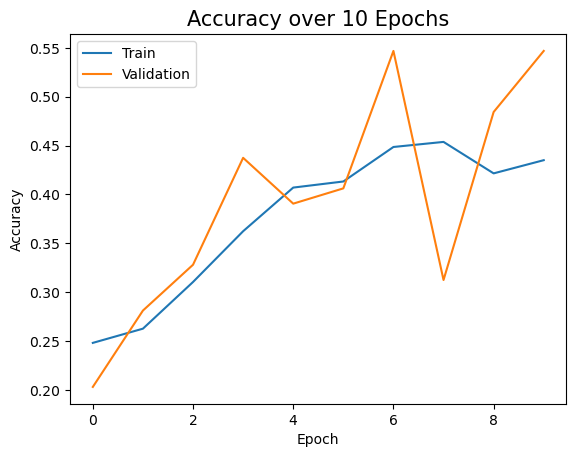

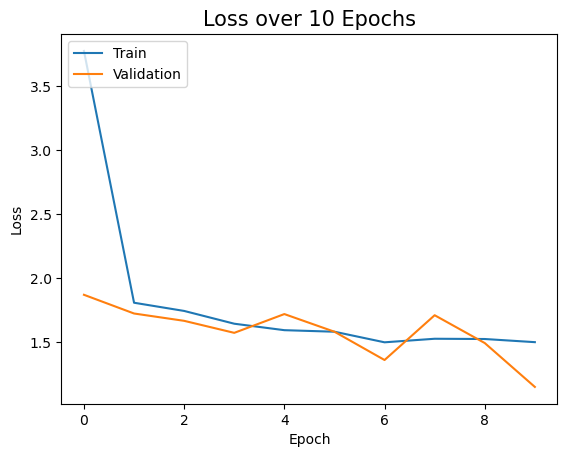

In [95]:
def plot_acc_loss(model, epochs):
    # Plot training & validation accuracy values
    plt.plot(model.history.history['accuracy'])
    plt.plot(model.history.history['val_accuracy'])
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_acc_loss(model, 10)


In [96]:
test_loss, test_acc = model.evaluate(validation, steps = 10)
print('test acc:', test_acc)

10/10 [==============================] - 17s 2s/step - loss: 1.4053 - accuracy: 0.4916
test acc: 0.49159663915634155


In [97]:
model.trainable = True

# Un-freeze last 12 layers
for layer in model.layers[:-12]:
    layer.trainable = False

In [98]:
## with the unfreezing of the top most 12 layers, we will recompile it using a smaller learning rate.

model.compile(loss = 'categorical_crossentropy'
             ,optimizer = optimizers.Adam(learning_rate = 0.001)
             ,metrics = ['accuracy'])

In [115]:
initial_epochs = 10
fine_tune_epochs = initial_epochs + 10

# Refit the model
history_2 = model.fit(train,
                       epochs = fine_tune_epochs,
                       validation_data = validation,
                       validation_steps = int(0.25*len(validation)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 10/20
31/31 [==============================] - 124s 4s/step - loss: 1.2051 - accuracy: 0.5535 - val_loss: 1.2744 - val_accuracy: 0.5469
Epoch 11/20
31/31 [==============================] - 123s 4s/step - loss: 1.1753 - accuracy: 0.5472 - val_loss: 1.1430 - val_accuracy: 0.5625
Epoch 12/20
31/31 [==============================] - 171s 5s/step - loss: 1.1842 - accuracy: 0.5493 - val_loss: 1.1657 - val_accuracy: 0.5312
Epoch 13/20
31/31 [==============================] - 176s 6s/step - loss: 1.2014 - accuracy: 0.5441 - val_loss: 1.2009 - val_accuracy: 0.6094
Epoch 14/20
31/31 [==============================] - 170s 5s/step - loss: 1.1831 - accuracy: 0.5618 - val_loss: 1.2956 - val_accuracy: 0.5781
Epoch 15/20
31/31 [==============================] - 130s 4s/step - loss: 1.1804 - accuracy: 0.5576 - val_loss: 1.2543 - val_accuracy: 0.5469
Epoch 16/20
31/31 [==============================] - 130s 4s/step - loss: 1.1749 - accuracy: 0.5680 - val_loss: 1.0968 - val_accuracy: 0.6094
Epoch 

In [116]:
test_loss, test_acc = model.evaluate(validation)
print('test acc:', test_acc)

8/8 [==============================] - 18s 2s/step - loss: 1.1929 - accuracy: 0.6008
test acc: 0.6008403301239014


In [102]:
# Save the model
model.save('chess_class.h5')

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [103]:
model2 = models.load_model('chess_class.h5')

In [104]:
import numpy as np

# use the model to predict all test images
pred = model.predict(validation)
pred = np.argmax(pred, axis = 1)

# Map the label
labels = (validation.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

8/8 [==============================] - 15s 2s/step


In [122]:
from sklearn.metrics import classification_report
from io import StringIO

# Assuming 'pred' is your predicted labels
y_pred = model.predict(validation)

# Convert the one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the generator
y_true = validation.classes

# Map class indices to class names using the class_indices attribute
class_indices = validation.class_indices
y_true_names = [key for key, value in class_indices.items()]

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=y_true_names)

print(report)


8/8 [==============================] - 16s 2s/step
                precision    recall  f1-score   support

  King_resized       0.00      0.00      0.00        15
 Queen-Resized       0.19      0.21      0.20        38
   Rook-resize       0.16      0.19      0.17        48
bishop_resized       0.21      0.18      0.19        45
 knight-resize       0.29      0.33      0.31        55
  pawn_resized       0.06      0.05      0.06        37

      accuracy                           0.19       238
     macro avg       0.15      0.16      0.15       238
  weighted avg       0.18      0.19      0.18       238



'                precision    recall  f1-score   support\n\n  King_resized       0.00      0.00      0.00        15\n Queen-Resized       0.19      0.21      0.20        38\n   Rook-resize       0.16      0.19      0.17        48\nbishop_resized       0.21      0.18      0.19        45\n knight-resize       0.29      0.33      0.31        55\n  pawn_resized       0.06      0.05      0.06        37\n\n      accuracy                           0.19       238\n     macro avg       0.15      0.16      0.15       238\n  weighted avg       0.18      0.19      0.18       238\n'

In [ ]:
# with the predicted test images, let's take a look at how our model performs

import matplotlib.pyplot as plt

# Display 24 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 24)
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validation.data_dir.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)

plt.tight_layout()
plt.show()

8/8 [==============================] - 16s 2s/step


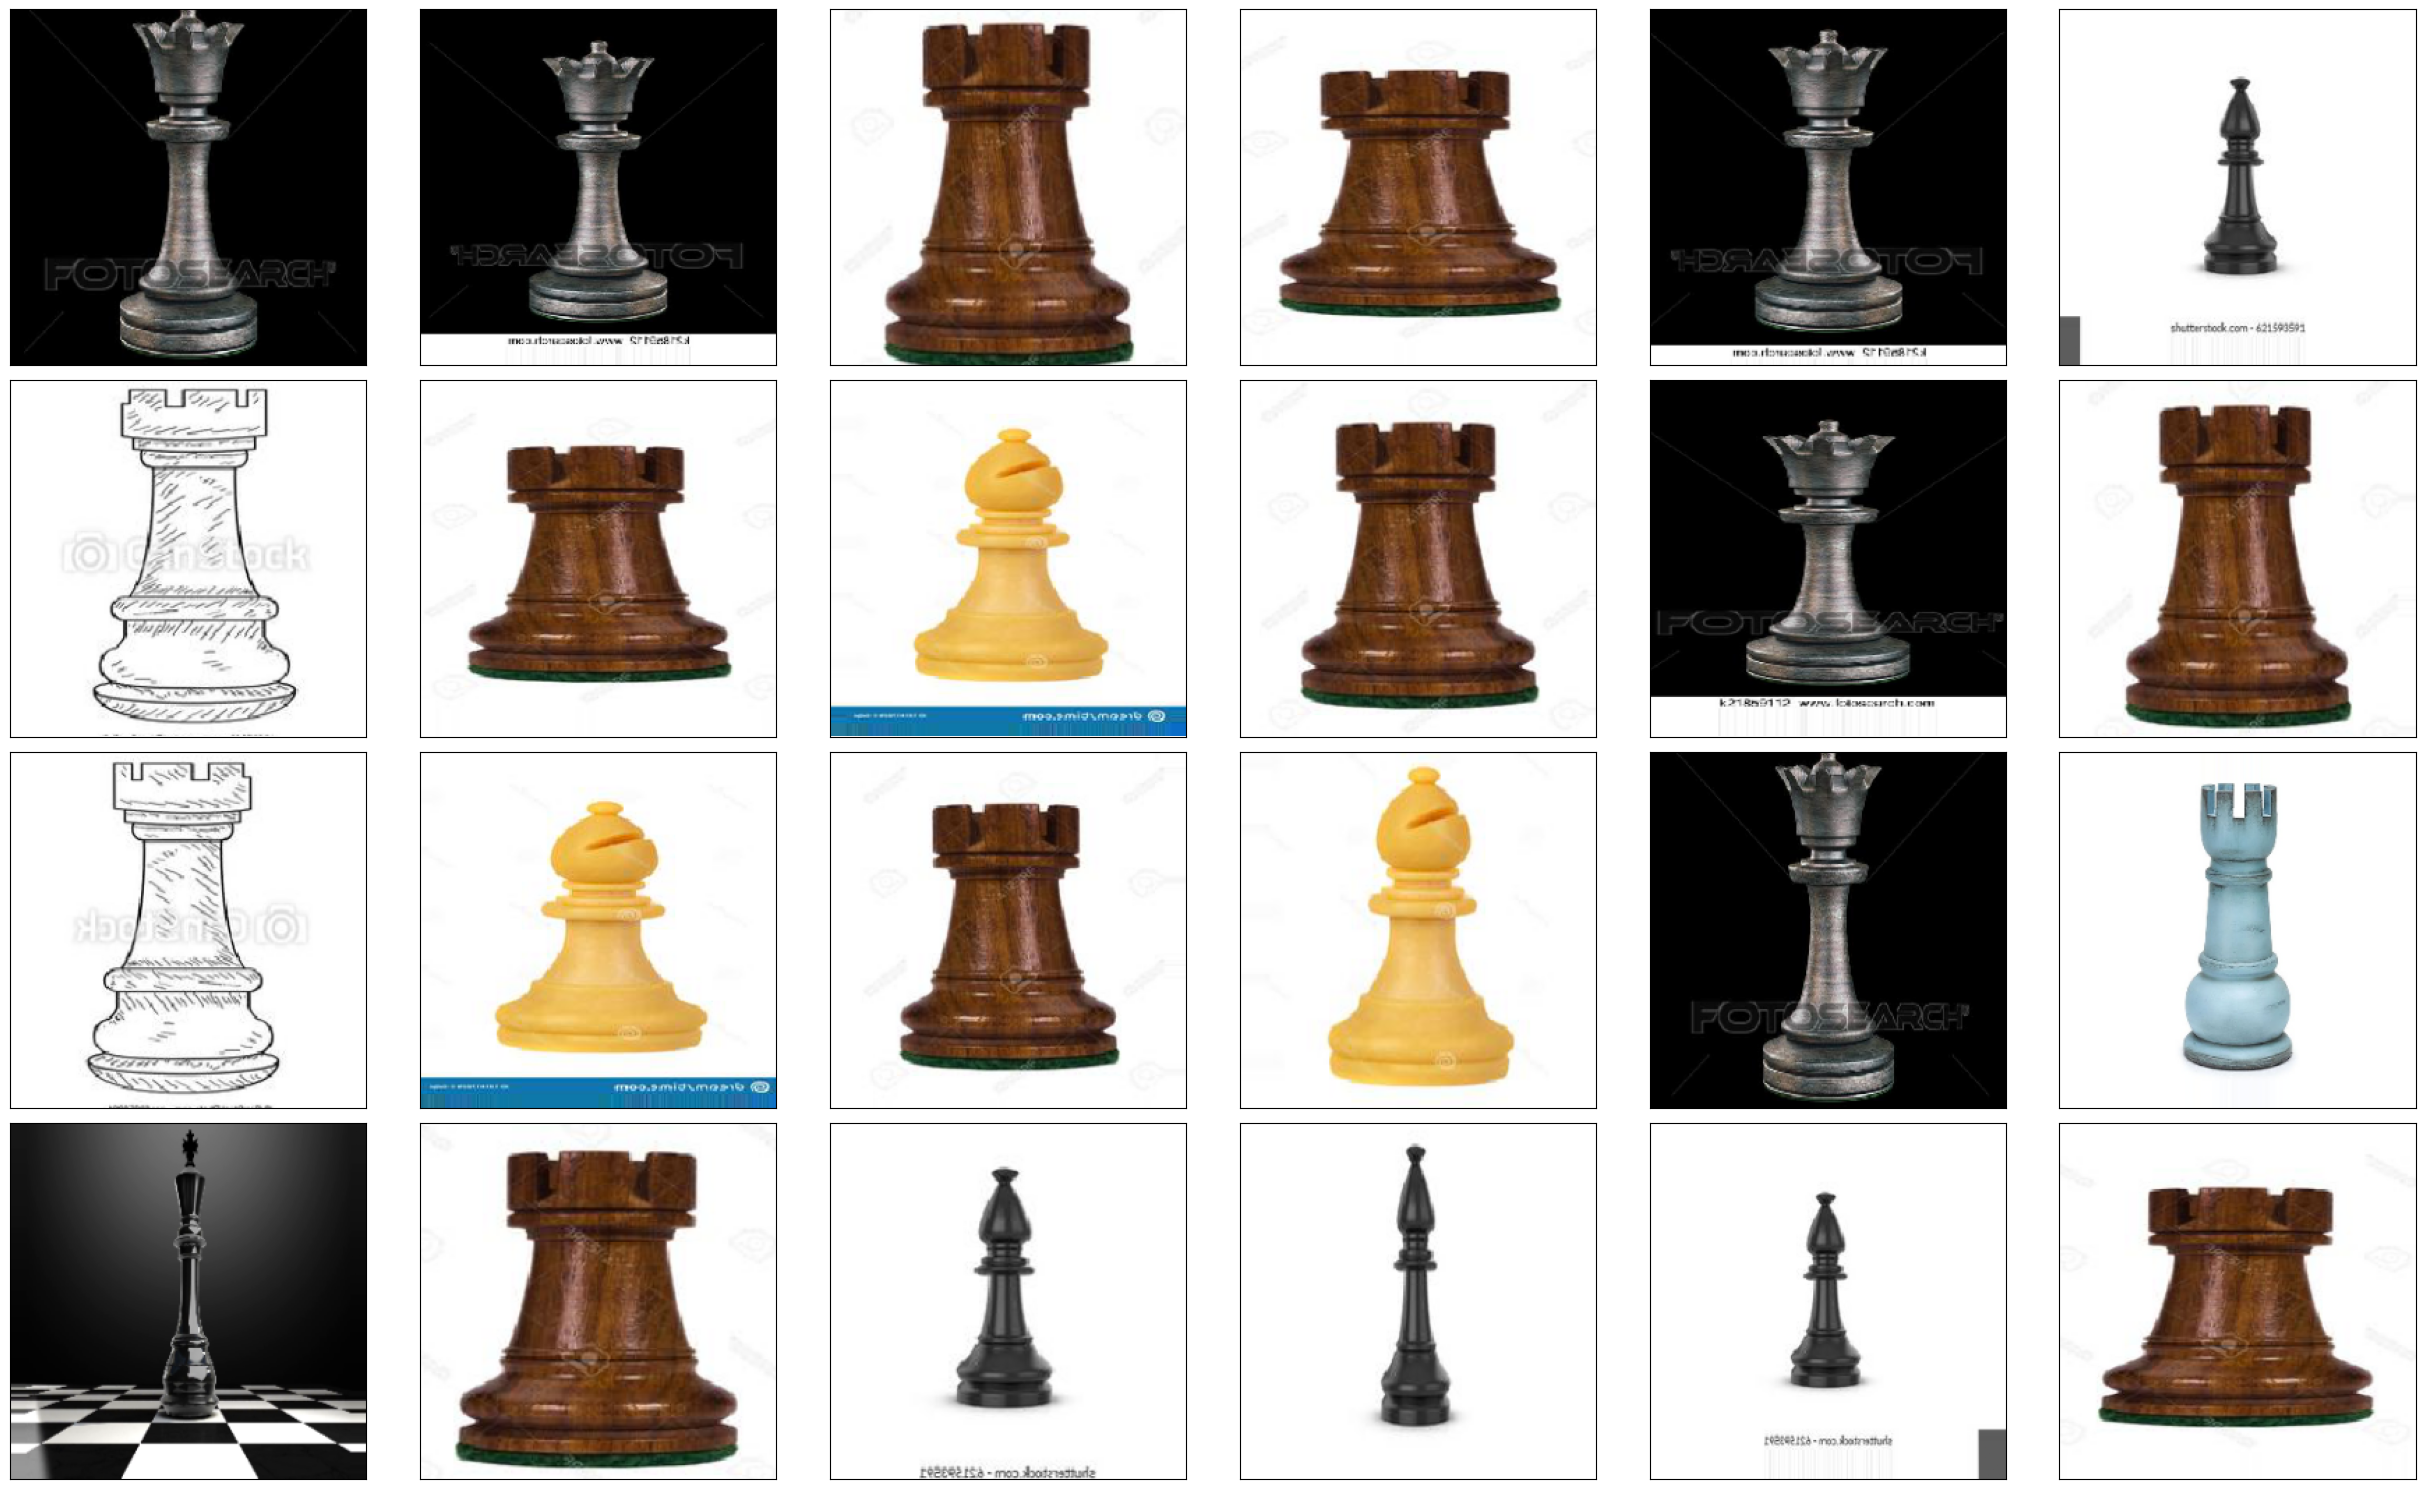

In [126]:
import matplotlib.pyplot as plt

# Assuming 'pred' is your predicted labels
y_pred = model.predict(validation)

# Convert the one-hot encoded predictions to class labels
pred_classes = np.argmax(y_pred, axis=1)

# Assuming 'validation' is your validation generator
random_index = np.random.randint(0, len(validation) - 1, 24)
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(25, 15),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Load and show the image from the generator
    img, label = validation[random_index[i]]
    ax.imshow(img[0])  # Assuming the batch size is 1, change if batch size is different
    
    # Get the true and predicted labels
    true_label = np.argmax(label, axis=0)
    pred_label = pred_classes[random_index[i]]
    
       # Set the title with different colors for correct and incorrect predictions
    if np.array_equal(true_label, pred_label):
        color = "green"
    else:
        color = "red"


plt.tight_layout()
plt.show()
